In [ ]:
#| default_exp introduction_to_control_problem

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
from IPython.display import display, HTML
display(HTML("<link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css'>"))

# Introduction to the control problem

Hello, dear readers! Throughout this journey, we've delved into the wonders of control systems, discussing its essential terminologies and feedback structures. Let's explore further using more real-world examples to strengthen our understanding.

## Servo Mechanism for Antenna Steering

A typical radar application involves steering an antenna such that it remains aligned with a target - like tracking an aircraft in flight. This alignment and tracking mechanism is achieved using a servo mechanism.


<table><tr>
<td> <img src="./pics/03_introduction_to_control_problem_antenna-tracking-system.png?1" alt="antenna-tracking-system" style="width: 250px;"/>
    <img src="./pics/03_introduction_to_control_problem_antenna-tracking-system-gopal.png?1" alt="antenna-tracking-system-gopal" style="width: 450px;"/>
</tr></table> 

- command signal for the servo: deviation between the antenna axis and the target's position
- this is needed to steer the antenna and reduce the error to zero

As you observe in the above diagram, our antenna configuration has two main degrees of freedom:

- Elevation angle around the horizontal axis.
- Azimuth angle (denoted as $\beta$) around the vertical axis.

This makes our system a multivariable one. But wait, is there a way to simplify it?

> **Thought Bubble**: Can you recall a scenario where we can treat a multivariable system almost like a series of single-input-single-output systems?
Correct! If the interaction (or coupling) between these variables can be neglected, we can design our control systems separately for each degree of freedom.



To elucidate, let's zoom into the azimuth control ($\beta$).

### Azimuth Control Block Diagram

<table><tr>
<td> <img src="./pics/03_introduction_to_control_problem_antenna-tracking-system-gopal-block-diagram.png" alt="antenna-tracking-system-gopal-block-diagram" style="width: 650px;"/>    
</tr></table> 


- Azimuth angle is $\beta$ (controlled angle)
- Command signal given by the radar sensor: $\beta_r$
- 'Computer' does error detection and control, which means that we need a suitable sensor to read the angle $\beta$.
    - output of the computing element is $u$ (manipulated signal)
- Shaft-angle encoder: transform the analog signal $\beta$ (angular displacement) into a digital signal
- Power amplifier generated the signal that drives the motor (DC armature control motor) - change the power level to meet the requirement of the motor
- Between the motor shaft and the antenna we have a **gear train** because the torque required to move the antenna is larger than the torque produced by a typical motor.

### Tachogenerator
There's a twist in our tale. As you might've observed in the diagram, we have introduced an additional feedback mechanism via a tachogenerator.

The tachogenerator, attached to the motor shaft, produces a voltage signal proportional to the shaft's velocity. _This allows us not just to feedback the antenna's position but also its rate of change (or velocity)._

- the velocity is the derivative of the controlled variable $\beta$.

> **Pop Quiz**: Can you think of why feedback about the velocity might be useful in our control system?

This dual feedback mechanism is what we refer to as "proportional plus derivative control". It's an essential concept in control system design, as it helps in precise control by considering both the position and its rate of change.

We can put this into our standard block diagram form:

<table><tr>
<td> <img src="./pics/03_introduction_to_control_problem_antenna-tracking-system-gopal-block-diagram-standard-form.png?1" alt="antenna-tracking-system-gopal-block-diagram-standard-form" style="width: 650px;"/>    
</tr></table> 


- The load is the antenna.
- The antenna, the gear and the motor shaft all they represent the plan. If we want to come up with a model of the system we need to model all this, which in practise will mean:
    - Knowing the moment of inertia $J$ and the friction $B$.

## Speed Control in Industry

Speed control is vital in many industries, especially where consistency is crucial. Think of paper mills or steel production plants, where rollers must maintain a consistent speed to produce a uniform product, ensuring product quality and safety.

<table><tr>
<td> <img src="./pics/03_introduction_to_control_problem_speed-control-diagram-rollers.png?1" alt="speed-control-diagram-rollers" style="width: 650px;"/>    
</tr></table> 

To ensure consistent speed, despite disturbances like varying material thickness or power fluctuations, we employ a control system. 

<table><tr>
<td> <img src="./pics/03_introduction_to_control_problem_speed-control-diagram.png?1" alt="speed-control-diagram" style="width: 650px;"/>    
</tr></table> 

- Commanded Speed Position: The commanded speed position is represented by $\omega_r$. In the illustrated diagram, this denotes the commanded speed. This is the reference signal that gets compared to the actual feedback signal from the system $\omega$.

- Feedback Mechanism:
   - The tachogenerator, which is attached to the motor shaft, provides the feedback in this system. This mechanism captures the actual speed and sends a feedback signal to the main system.
     To provide a clearer image, imagine a DC motor (as depicted in our diagram). The tachogenerator is coupled to this motor's shaft. The load attached to this motor has certain parameters – namely $J$ (moment of inertia) and $B$ (viscous friction).


- Translating Speed to Voltage:
    - The tachogenerator does not directly generate a speed signal. Instead, it generates a voltage signal that is proportional to the speed. This is crucial because it means our reference signal, $\omega_r$, will also be a voltage proportional to the desired speed.
Hence, in this system, the error detector could be an operational amplifier (often called an op-amp). This op-amp circuit accepts the voltage signals that represent the commanded and actual speeds, compares them, and then generates a signal proportional to the error between these two signals.

> Question: Why is the speed translated to voltage in this system?
Answer: It's to ensure that the feedback and reference signals are in the same format (voltage) for the error detector to compare.

- Digital Control Adaptation:
For those keen on a digital control scheme, introducing an A to D (Analog to Digital) converter block can digitize the analog signal generated from the error detection. This digital signal can then be processed by a computer system.

- Power Delivery Control:

The main aim of this control scheme is to modulate the power supplied to the motor based on the difference (error) between the commanded and actual positions.

In the provided scheme, a silicon control rectifier (SCR) manages this. Without delving into the hardware specifics just yet, the feedback structure inherent in the control scheme reveals a SCR trigger control. The triggering of the SCR dictates the power supply to the motor, thus influencing the torque generated by the motor to achieve $\omega=\omega_r$.

Whether $\omega_r$ is a changing signal over time or a fixed set point, the control scheme can function as either a tracking system or a regulator. We will delve deeper into these types of applications and their speed controls later.

# Key terminology
As we prepare to go deeper into these systems, it is essential to familiarize ourselves with some key terms:

- Process/Plant: These terms can be used interchangeably. Their understanding is crucial.
- Actuator: Recall its function - to adjust the power level of the control signal to make it compatible with the motor or plant.
- Controller: This comprises mainly two subsystems:
      - Error Detector: This compares the reference or command signal with the actual controlled signal.
      - Control Logic: This defines how the system responds to the error. Examples include simple proportional logic or more complex proportional plus derivative logic, etc.

- Sensor: A sensor's role is pivotal. It generates a feedback signal to align with the reference or command signal, allowing the error detector to compare and act.

In a model-based design, understanding and building the mathematical model of these subsystems is fundamental. The mathematical models will be integrated to represent the overall feedback control system.

# Mathematical Models of Physical Systems

Control systems play a pivotal role in modern technological advancements, from household appliances to space exploration. To design and analyze these systems, it's essential to first create mathematical models of the physical processes underlying them. Mathematical models serve as abstract representations, helping engineers and scientists predict system behavior under various conditions. This chapter delves into the foundational concepts and techniques for formulating these models, primarily drawing inspiration from the seminal work of Nagrath and Gopal in their book on Control Systems.

## Why Mathematical Models?

Definition: A mathematical model is an abstract representation of a physical system in the form of mathematical equations. It describes the system's behavior and how it responds to various inputs.

Benefits:

- Predictive Analysis: Allows for predictions about future behavior.
- System Optimization: Facilitates adjustments for optimal performance.
- Simulation: Enables system simulation before actual implementation.
- Cost-Efficient: Reduces the need for expensive and time-consuming real-world testing.

## Types of Physical Systems:
Physical systems can be broadly categorized based on their inherent nature:

- **Linear vs. Non-linear Systems**: Linear systems obey the principle of superposition and homogeneity, while non-linear systems do not.
- **Time-Invariant vs. Time-Variant Systems**: In time-invariant systems, the parameters don't change with time. In contrast, they do in time-variant systems.
- **Continuous-time vs. Discrete-time System**s: Continuous-time systems operate over a continuous range of time, while discrete-time systems operate at specific intervals.

## Steps in Formulating Mathematical Models:

1. System Identification: Determine the type of system (e.g., mechanical, electrical, thermal).
2. Simplification: Make reasonable approximations and neglect insignificant effects.
3. Selection of Variables: Choose appropriate state variables to describe the system.
4. Application of Fundamental Laws: Apply basic laws (like Ohm's law for electrical systems, Newton's laws for mechanical systems) to derive equations.
5. Representation: Use differential equations, transfer functions, or state-space models as needed.

## Linear Time Invariant Systems
In our upcoming discussions, all systems will be linear time invariant. Thus, our focus will pivot towards modeling these types of systems. It's presumed that at some point in your studies, you've encountered modeling of various systems, such as electrical, mechanical, fluidic, or thermal systems.

When we solve the mathematical model of a physical system under different input scenarios, the outcome depicts the system's dynamic behavior. 

> <i class="fa fa-lightbulb-o" aria-hidden="true"></i> 
A system's mathematical model is considered linear if it adheres to the principles of superposition and homogeneity.

if a system model has responses $y_1(t)$ and $y_2(t)$ to any two inputs $x_1(t)$ and $x_2,(t)$, the system response to the linear combination of these inputs:

$$ \alpha_1 x_1(t) + \alpha_2 x_2(t) $$ 

is given by the linear combination of the individual responses:

$$ \alpha_1 y_1(t) + \alpha_2 y_2(t) $$ 

Before diving further, a recap of the foundational physics laws, as they apply to linear time-invariant systems, will be beneficial. Although it might seem repetitive, this will ensure everyone is on the same page and understands the terminology.

- The application of the basic law of physics will provide differential equations. However, these equations might not be directly usable for analysis or design, and need to be transformed into a form that is more useful for control.

There are two main forms in control systems that are often leveraged:
1. state variable models 
2. transfer functions.





> <i class="fa fa-lightbulb-o" aria-hidden="true"></i> 
Differential equations often characterize the mathematical representations of many physical systems. A model is deemed linear when its defining differential equation possesses coefficients that are either solely dependent on the independent variable or remain constant. If these coefficients change over time (where time is the independent variable), the model is described as linear time-varying. Conversely, if the coefficients remain constant throughout, the model is labeled as linear time-invariant.

## State Variable Models

Using a simple electrical circuit as an example we can illustrate the concept of state variable models. 

In this circuit, the input variable is $e_i$. The output variable, in any system, is the attribute of focus. In our example, it could be the current through an element or the voltage across an element.

<table><tr>
<td> <img src="./pics/03_introduction_to_control_problem_state-variable-model-simple-circuit-precise-with-current.png?1" alt="state-variable-model-simple-circuit" style="width: 650px;"/>    
</tr></table> 

In this case, if we know the voltage through the capacitor $e(t)$ and the current through the inductor $i(t)$, we can derive any other variable of interest.

- **Characterising variables**: $e(t)$ and $i(t)$ completely characterise the system (a simple electrical network in this case)

Any output of interest can be obtained as a function of these variables
- For example, the energy stored in the capacitor is given by:
  $$ \frac{1}{2}Ce^2$$

- For example, the energy stored in the inductor is given by:
  $$ \frac{1}{2}Li^2$$


The dynamic changes in our characterizing variables, $e(t)$ and $i(t)$, signify the redistribution of energy within the system. Recognizing these variables, which represent the energy state, provides comprehensive insight into the system's behavior.  

How do I get $e(t)$ and $i(t)$:
- $e(t)$ and $i(t)$ at any time $t \ge 0$ is available to me if:
     - $e(0), i(0)$ at $t = 0$ are known (initial energy state of the system)
     - external input $e_i(t)$ is known for $t \ge 0$
 
We call $e(t)$ and $i(t)$ **State variables**.


### State Variable (informal) definition

> The state variables are a set of characterizing variable which provide the total information about the system at any time provided the initial state and the external input.

Coming back to our electrical system:

- Resistance parameter: $R$
- Capacitance: $C$
- Inductance: $L$
- Current: $i$

Applying the basic laws:

The loop equation is given by:
$$
e_i= R i + e + \frac{Ldi}{dt}
$$ 

And also:

$$
i = C\frac{de}{dt}
$$

These two equations constitute our mathematical system model.

#### State Variable Model of the circuit
With our mathematical model in place, we proceed to the State Variable Model. 

The goal here is to have the model express the derivatives of our characterizing variables. For this system, the characterizing variables are $e(t)$ and $i(t)$.

This means:

$$
\frac{de(t)}{dt} = \frac{1}{C}i(t)
$$

$$
\frac{di(t)}{dt} = \frac{R}{L}i(t) + \frac{1}{L}e(t) + \frac{1}{L}e_i(t)
$$


For ease of representation and standardization, we define:

$$x_1=e(t)$$
$$x_2=i(t)$$

and I call the input variable:

$$
r=e_i(t)
$$



So the system model in state variable form is:



$$
\begin{aligned}
    \frac{dx_1}{dt} &= \frac{1}{C} x_2 \\
    \frac{dx_2}{dt} &= \frac{R}{L} x_2 + \frac{1}{L} x_1 + \frac{1}{L} R
\end{aligned}
$$

These equations together represent the State Equations of the system.

**Output Information**: It's essential to know what information we are interested in or what we wish to observe from the system. 

Suppose we are interested in the voltage across the inductor $y(t)$. Using the given state variables, we can express:

$$
y(t) = -Ri - e + e_i = -Rx_2 - x_1+r
$$

This equation is an **Output Equation**, showing how the output depends on our state and input variables.

## Standard State Variable Model

The generalized state-variable model for a system with $ n $ state variables, one input and one output is represented by the following matrix-vector differential equations:


\begin{aligned}
\dot{\mathbf{x}}(t) &= \mathbf{A} \mathbf{x}(t) + \mathbf{b} u(t) \\
y(t) &= \mathbf{c} \mathbf{x}(t) + d u(t)
\end{aligned}

Where:

- $ \mathbf{x}(t) $ is the state vector of dimension $ n \times 1 $:

$$
\mathbf{x}(t) = \begin{bmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_n(t)
\end{bmatrix}
$$

- $ u(t) $ is a scalar input
- $ y(t) $ is a scalar output


- $ \mathbf{A} $ is the **system matrix** of dimension $ n \times n $
- $ \mathbf{b} $ is the **input vector** of dimension $ n \times 1 $
- $ \mathbf{c} $ is the **output vector** of dimension $ 1 \times n $
- $ d $ is the **direct transmission matrix** of dimension $ 1 \times 1 $.



We can generalise it to a system with $ n $ state variables, $m$ inputs and $p$ outputs

\begin{aligned}
\dot{\mathbf{x}}(t) &= \mathbf{A} \mathbf{x}(t) + \mathbf{B} \mathbf{u}(t) \\
\mathbf{y}(t) &= \mathbf{C} \mathbf{x}(t) + \mathbf{D} \mathbf{u}(t)
\end{aligned}

Where:

- $ \mathbf{x}(t) $ is the state vector of dimension $ n \times 1 $:

$$
\mathbf{x}(t) = \begin{bmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_n(t)
\end{bmatrix}
$$

- $ \mathbf{A} $ is the system matrix of dimension $ n \times n $.
- $ \mathbf{B} $ is the input matrix of dimension $ n \times m $ (assuming there are $ m $ inputs).
- $ \mathbf{C} $ is the output matrix of dimension $ p \times n $ (assuming there are $ p $ outputs).
- $ \mathbf{D} $ is the direct transmission matrix of dimension $ p \times m $.
- $ \mathbf{u}(t) $ is the input vector.
- $ \mathbf{y}(t) $ is the output vector.

This format is often referred to as the "state-space" representation of dynamic systems. It provides a compact and modular way to describe the behavior of a wide range of systems, including electrical, mechanical, thermal, and more.

### Terminology

- Bold lowercase letters or lowercase letters with an underline indicate vectors.
- Bold uppercase letters or uppercase letters with an underline indicate matrices.
- No underline indicates a scalar.

# Mass-Spring-Damper

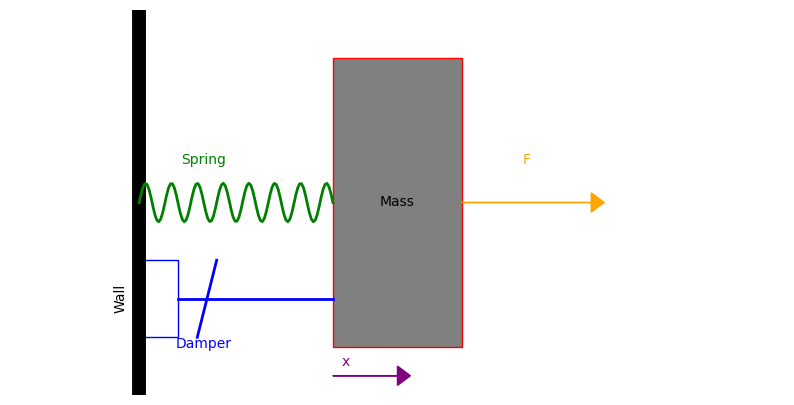

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_mass_spring_damper(position=0.5, force=1.0):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw wall
    ax.plot([-1, -1], [0, 2], color='k', lw=10)
    ax.text(-1.2, 0.5, 'Wall', rotation='vertical', va='center')

    # Draw spring
    x_spring = np.linspace(-1, position, 100)
    y_spring = 1 + 0.1 * np.sin(10 * np.pi * x_spring)
    ax.plot(x_spring, y_spring, 'g', lw=2)
    ax.text(-0.5, 1.2, 'Spring', color='g', ha='center')

    # Draw damper
    damper_length = position + 1
    damper_rect_width = damper_length / 5.0
    damper_rect = patches.Rectangle((-1, 0.3), damper_rect_width, 0.4, linewidth=1, edgecolor='b', facecolor='white')
    ax.add_patch(damper_rect)
    ax.plot([-1 + damper_rect_width, position], [0.5, 0.5], 'b', lw=2)
    ax.plot([-1 + damper_rect_width * 1.5, -1 + damper_rect_width * 2], [0.3, 0.7], 'b', lw=2)
    ax.text(-0.5, 0.3, 'Damper', color='b', ha='center', va='top')

    # Draw mass (as cart)
    cart_rect = patches.Rectangle((position, 0.25), 1, 1.5, linewidth=1, edgecolor='r', facecolor='gray')
    ax.add_patch(cart_rect)
    ax.text(position + 0.5, 1, 'Mass', ha='center', va='center')

    # Draw Force
    ax.arrow(position + 1, 1, force, 0, head_width=0.1, head_length=0.1, fc='orange', ec='orange')
    ax.text(position + 1 + force/2, 1.2, 'F', color='orange', ha='center')

    # Draw displacement
    ax.arrow(0.5, 0.1, position, 0, head_width=0.1, head_length=0.1, fc='purple', ec='purple')
    ax.text(0.6, 0.15, 'x', color='purple', ha='center')

    ax.set_xlim(-2, 3 + force)
    ax.set_ylim(0, 2)
    ax.axis('off')
    plt.show()

draw_mass_spring_damper(position=0.5, force=1.0)


Consider the physical system of a mass-spring-damper:

- Mass: $M$ 
- Spring constant: $K$
- Damping coefficient: $B$
- External force: $F(t)$
- Displacement of the cart from equilibrium: $x$

We first write the differential equation of the system and then we will manipulate the differential equation to have it in the standard state variable form.

Using Newton's second law, the governing differential equation is:

$$
F(t) = M \frac{dv}{dt} + B v + Kx 
$$

where:
- $v$ is the velocity variable

This equation can be transformed into a state variable model.

In this case, $x(t)$ (Displacement) and $v(t)$ are the characterising variables.

We can then define the State Variables as:
- $x_1 = x(t)$ (Displacement)
- $x_2 = v(t)$ (Velocity)


Which means, for the first state variable:
$$
\frac{dx}{dt} = v
$$

and in terms of state variables
$$
\dot{x_1} = x_2
$$

and for the second state variable, I need to consider the original differential equation:

$$
\frac{dv}{dt} = -\frac{K}{M} x - \frac{B}{M} v + \frac{1}{M} F(t)
$$

and now in terms of state variables:

$$
\dot{x_2} = -\frac{K}{M} x_1 - \frac{B}{M} x_2 + \frac{1}{M} u
$$



> **Question**: Why do we have two equations? We have two state variables.

The state vector is:
$$
\underline{x}(t) = \begin{bmatrix}
x_1(t) \\
x_2(t) \\
\end{bmatrix} = = \begin{bmatrix}
x \\
v(t) \\
\end{bmatrix}
$$


The state matrix is:

$$
\underline{A} = \begin{bmatrix}
0  & 1\\
-\frac{K}{M} & -\frac{B}{M} \\
\end{bmatrix} 
$$

The input vector is:

$$
\underline{b} = \begin{bmatrix}
0 \\
\frac{1}{M}\\
\end{bmatrix} 
$$

The $\underline{c}$ and $d$ depend on the output variable of choice.


In the context of our mass-spring-damper system, if we consider the displacement of the mass as our output variable, it signifies the user's requirement to control this displacement. This specific requirement dictates the output variable of interest. In this scenario, the objective is to express the output variable in terms of the state variables.


If the displacement of the mass is the output then, the **output equation** becomes:

$$
y(t) = x = \underline{c} \underline{x} + d u(t)
$$

from which:

$$
\underline{c} = \begin{bmatrix}
1 & 0 \\
\end{bmatrix} 
$$


$$
d = 0
$$

and we now have the complete standard state variable model:


\begin{aligned}
\dot{\underline{x}}(t) &= \underline{A} \underline{x}(t) + \underline{b} u(t) \\
y(t) &= \underline{c} \underline{x}(t) + d u(t)
\end{aligned}


Note:

\begin{aligned}
\dot{\underline{x}}(t) &= \underline{A} \underline{x}(t) + \underline{b} u(t) \\
\end{aligned}

is called **state equation**.

## Understanding State Variables

To accentuate a crucial aspect, in the examples shared earlier, we've considered physical variables as the system's state variables. However, it's important to note: state variables are introduced primarily for mathematical convenience.

> State variables need not always be physical variables. They can be defined based on mathematical or modeling needs.

- Input and output variables need to be physical variables.


Can we define $ x_1 $ as $ x(t) + v(t) $ and $ x_2 $ as just $ v(t) $?

The answer is, theoretically, yes. 

- $x_2$ remains the velocity, $x_1$ - the sum of displacement and velocity - doesn't correspond to a distinct physical variable. 
- The sum of displacement and velocity is a numerical value, with no physical meaning.
- Hence, while $x_1$ and $x_2$ aren't independent physical variables, state equations can still be defined in their terms. 

- The resulting output can be represented using $x_1$ and $x_2$, although the output equation might differ from the previous case. However, for every input, the output remains uniquely defined.

State variables, such as $x_1$ and $x_2$, aren't unique. They can be redefined in countless ways, but for any specific input, a unique output is guaranteed. These state variables are largely matters of convenience. Depending on the requirements of analysis and design, state variables may vary.


To illustrate, let's revisit our electrical circuit example. We previously recognized the capacitor's voltage as a state variable. Nonetheless, there's no constraint preventing us from selecting the stored charge in the capacitor as the state variable. Whether the state variable is designated as $q$ (charge) or $e$ (voltage), for a given input, the output remains consistent across all state variable definitions.